# 케라스 인공 신경망 응용

---------

### 케라스를 이용한 다층 퍼셉트론 구현 예제

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

[`keras.datasets.fashion_mnist`](https://keras.io/api/datasets/fashion_mnist/) 데이터를 이용한 예제를 살펴보자.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


훈련 세트는 60,000개의 흑백 이미지이며, 각 이미지의 크기는 28x28 픽셀이다.

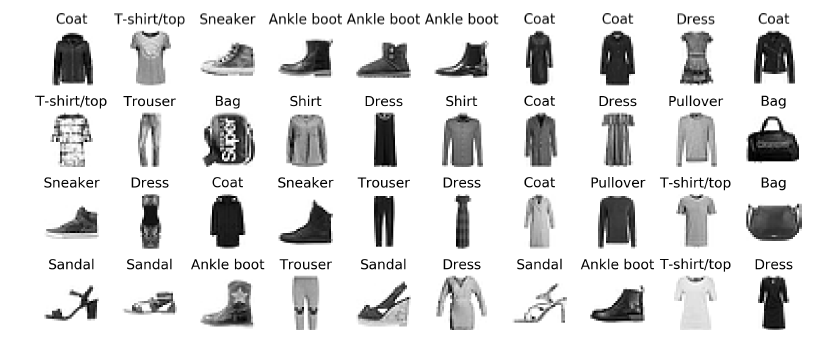

```X```는 3차원 데이터셋이다. 첫번째 차원은 데이터의 수 (샘플의 수)를 나타낸다.

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
# X의 개수와 같다.
y_train_full.shape

(60000,)

In [9]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

전체 훈련 세트를 검증 세트와 (조금 더 작은) 훈련 세트로 나누고, 픽셀 강도를 255로 나누어 0~1 범위의 실수로 바꾼다.

* 검증 세트 (validation set)은 모델 훈련에 사용되지 않으며, 보통 최적의 하이퍼 파라미터나 훈련 방법 등을 선택하기 위한 목적으로 활용된다.
* 테스트 세트는 마찬가지로 훈련에 사용되지 않으며, 최종적인 성능 평가를 위해 사용된다. 

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

[`plt.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)로 사진의 내용을 볼 수 있다.

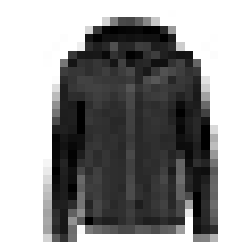

In [11]:
plt.figure(figsize=(3,4))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

레이블(label)은 0에서 9까지의 정수 배열로, 이 값은 이미지에 있는 옷의 클래스(class)를 나타낸다.

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
# 두 개의 은닉층이 있는 분류용 다층 퍼셉트론 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

<p> <font color=#00008B> &#9635 모형 설명 </font> </p>

위 코드를 살펴보자.

* 첫번째 라인은 Sequential 모델을 만든다. 이 모델은 케라스의 가장 간단한 신경망 모형이다. 순서대로 연결된 층을 일렬로 쌓아 구성할 것이다.


* 그 다음 첫 번째 층을 만들어 추가한다. [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) 층은 입력 이미지를 1D 배열로 변환한다.


* 그 다음은 뉴런(유닛) 300개를 가진 Dense 층을 추가한다. Dense 층은 각자 가중치 행렬을 관리한다.


* 그 다음은 100개의 유닛을 가진 두 번째 은닉층을 추가한다.


* 마지막으로 소프트맥스 함수를 가지고, 10개(클래스 수와 일치)의 유닛을 가진 Dense 출력층을 추가한다.

  * Softmax는 값 벡터를 확률값 벡터로 변환한다.  
  * 따라서 출력값은 0과 1사이로서, 합이 1이 된다.
  * 만약, 이진 분류를 한다면 출력층에서 softmax 대신 sigmoid를 이용하고, unit의 수는 1개로 한다.
  

In [15]:
# 혹은 아래와 같이 표현할 수도 있다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p> <font color=#00008B> &#9635 입력, 출력, 모수 (가중치) 설명 </font> </p>

첫번째 Flatten layer는 따로 모수가 필요하지 않다.  이 층은 단순히 입력된 $28\times28$의 자료를 1차원 벡터처럼 바꾸어준다.

하나의 X 데이터를 sliciing하여 첫번째 layer에 적용하여 결과를 살펴보자.

모델에서 layer를 추출할 때는 `.get_layer()` method를 이용하거나 `.layers` attribute를 이용한다.

In [18]:
X_train_full[:1, :, :].shape

(1, 28, 28)

In [19]:
# 첫 번째 층
flattend = model.get_layer(index=0)(X_train_full[:1, :, :])
flattend.shape

TensorShape([1, 784])

그 다음의 Dense layer는 bias term을 포함하여 $28 \times 28  + 1 = 785$개의 입력이 있다.

따라서 각 뉴런 (유닛)에는 785개의 paramter가 있다.

총 300개의 뉴런이 있으니 이 layer의 총 parameter의 수는 $785 \times 300 = 235500$이다.

뉴런의 개수와 동일한 300개 값으로 구성된 output이 발생한다.

In [20]:
# 두 번째 층
output1 = model.layers[1](flattend)
output1.shape

TensorShape([1, 300])

케라스 뉴럴 네트워크 내에서 전달되는 값들은 [`tf.Tensor`](https://www.tensorflow.org/api_docs/python/tf/Tensor)들로 numpy array와 흡사하지만, GPU computing 등 인공 지능에 필요한 연산에 보다 특화되어 있다. 

In [22]:
type(output1)

tensorflow.python.framework.ops.EagerTensor

여기서 발생한 출력을 다음 layer로 넘기면 100개의 값으로 구성된 output이 발생할 것이다.

In [23]:
# 세 번째 층
output2 = model.layers[2](output1)
output2.shape

TensorShape([1, 100])

마지막 dense layer를 통과하면 최종 출력은 10개의 값이다.

In [24]:
# 마지막 층
output3 = model.layers[3](output2)
output3

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

한편, 각 layer의 가중치들은 `.get_weights()`를 통해 얻을 수 있다.

초기의 가중치 값들은 랜덤으로 설정되어 있다.

In [25]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.05107751,  0.05274367,  0.00993802, ...,  0.04445969,
        -0.03044678, -0.01501678],
       [ 0.00775225,  0.00328198,  0.05456617, ..., -0.00939649,
         0.01631244, -0.00671938],
       [-0.06083969,  0.00356676,  0.0602361 , ..., -0.07033996,
        -0.01667866, -0.06843404],
       ...,
       [ 0.05334733,  0.03822777, -0.02229001, ...,  0.04096664,
        -0.04027233, -0.05093755],
       [ 0.0457454 ,  0.0047599 , -0.02945364, ..., -0.05749335,
        -0.01402507, -0.03866582],
       [ 0.05664402,  0.07340868, -0.06378857, ..., -0.05618786,
        -0.04448886,  0.00787701]], dtype=float32)

[`keras.utils.plot_model`](https://keras.io/api/utils/model_plotting_utils/#plotmodel-function)를 이용하여 모델을 시각화할 수 있다.

In [26]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


이전에 설명한 것처럼 모델 정의가 끝나면 complie 과정을 거친다.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

<p> <font color=#00008B> &#9635 컴파일 단계 설명 </font> </p>

* sparse_categorical_crossentropy는 ```y```의 레이블이 0에서 9까지 정수로 되어 있어 클래스가 배타적이므로 이 손실 함수를 이용하였다.  


* 만약 원-핫 벡터로 이루어져 있다면 categorical_crossentropy를 이용한다.  
  * 원-핫 벡터 : 올바른 클래스 인덱스에 1을 부여하고 나머지 인덱스에 0을 부여하는 방법 <br><br>
  
* 이진 분류라면 binary_crossentropy 손실을 사용한다.
  
* `"sgd"`는 가장 기본적인 확률적 경사 하강법으로 역전파 알고리즘을 수행한다.  



* 분류기의 경우 정확도 측정을 위해 accuracy를 사용한다.   

In [23]:
# 신경망 훈련, default batch size = 32
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7194 - accuracy: 0.7636 - val_loss: 0.5081 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4829 - accuracy: 0.8309 - val_loss: 0.4518 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4388 - accuracy: 0.8464 - val_loss: 0.4169 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4122 - accuracy: 0.8550 - val_loss: 0.3978 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3909 - accuracy: 0.8619 - val_loss: 0.3827 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3763 - accuracy: 0.8674 - val_loss: 0.3825 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3625 - accuracy: 0.8719 - val_loss: 0.3757 - val_accuracy

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
history

In [34]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.719382,0.763636,0.508070,0.8264
1,0.482947,0.830855,0.451761,0.8454
2,0.438820,0.846436,0.416900,0.8534
3,0.412237,0.855036,0.397832,0.8614
4,0.390927,0.861927,0.382710,0.8650
5,0.376340,0.867364,0.382473,0.8618
6,0.362535,0.871891,0.375718,0.8666
7,0.351493,0.874673,0.355611,0.8760
8,0.341135,0.878400,0.354939,0.8756
9,0.332381,0.882400,0.351459,0.8754


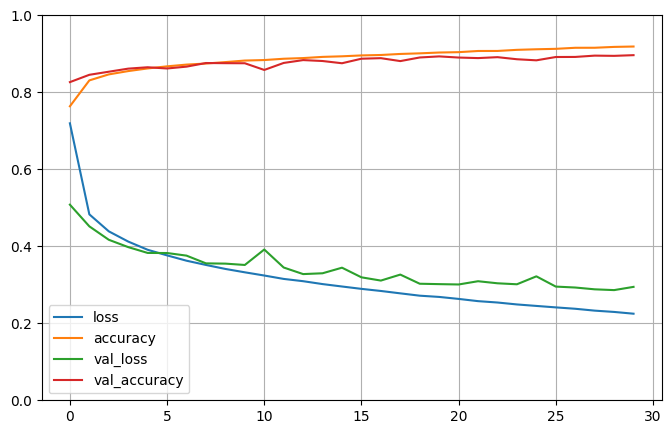

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

`.evaluate()` method와 테스트 셋을 이용하여 정확성 평가를 해 보자.

In [38]:
print(model.metrics_names)
model.evaluate(X_test, y_test)

['loss', 'accuracy']
313/313 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8858


[0.3258250653743744, 0.8858000040054321]

Test set 중 일부를 골라 그림과 같이 확인해 보겠다.

In [39]:
X_new = X_test[:3]

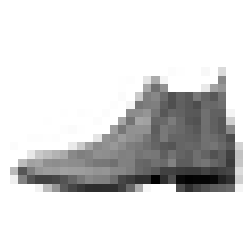

In [40]:
plt.figure(figsize=(3,4))
plt.imshow(X_new[0], cmap="binary")
plt.axis('off')
plt.show()

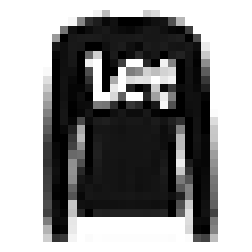

In [41]:
plt.figure(figsize=(3,4))
plt.imshow(X_new[1], cmap="binary")
plt.axis('off')
plt.show()

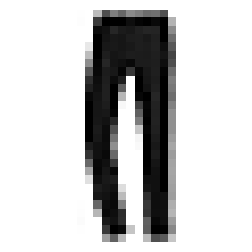

In [42]:
plt.figure(figsize=(3,4))
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

`model.predict`는 훈련된 모형을 통해 계산되어 마지막 softmax layer를 거쳐 계산된 확률값을 보여준다. 

In [43]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 251ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

[`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)는 최대값의 index를 반환한다.

이를 통해 softmax의 결과 중 가장 큰 확률값을 나타내는 클래스 번호를 찾아낼 수 있다.

In [44]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 32ms/step


array([9, 2, 1], dtype=int64)

In [46]:
# 클래스 이름으로 변환
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

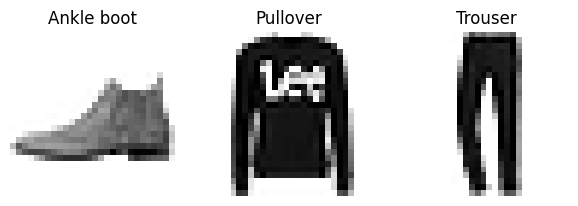

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Hyperparameter

#### 은닉층의 개수

은닉층 하나로 시작해도 많은 문제에서 납득할 만한 결과를 얻을 수 있다.

하지만 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 파라미터 효율성이 좋다.

심층 신경망에서 입력과 가까운 아래쪽 은닉층은 저수준 구조를 모델링하고

중간 은닉층은 저수준 구조를 연결해 중간 수준의 구조를 모델링한다.

가장 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결해 고수준의 구조를 모델링한다.

#### 은닉층의 뉴런 개수

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정된다.

은닉층의 구성방식은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성한다.

저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다.

하지만 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 낸다는 연구결과도 있다.

#### 학습률

좋은 학습률을 찾는 방법은 매우 낮은 학습률 ($10^{-5}$)에서 시작하여 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것이다.

학습률에 대한 손실을 그래프로 그리며 관찰한다.

학습률은 배치 크기에 영향을 받으므로 배치 크기가 바뀌었으면 학습률도 수정한다.

#### 배치 크기

배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있다.

많은 연구자들은 GPU의 RAM에 맞는 가장 큰 배치 크기를 사용하라고 권장한다.

어떤 학자는 32보다 큰 미니배치를 사용하지 말라고 한다.

하지만 또 어떤 학자들은 학습률 예열 방법을 이용하면 매우 큰 배치 (8,192)를 사용할 수 있다고도 한다.

다음 용어를 정리하라.

* 배치 크기 : 전체 트레이닝 데이터를 여러 개의 미니 배치로 나누었을 때 하나의 미니 배치에 속하는 데이터의 개수  
* 에포크 (epoch) : 전체 트레이닝 셋이 신경망을 통과한 횟수. 즉 1-epoch는 트레이닝 셋의 모든 데이터가 신경망을 한 번 통과했다는 뜻.

#### 활성화 함수

일반적으로 ReLU 활성화 함수가 좋다고 하나 수행하는 작업에 따라 달라질 것이다.

#### 반복 횟수

대부분의 경우 훈련 반복 횟수는 튜닝할 필요가 없고, 조기 종료를 사용한다.

### MNIST database of handwritten digits 예제

[MNIST (Modified National Institute of Standards and Technology database)](https://keras.io/api/datasets/mnist/) handwritten digits 데이터는 학습용으로 많이 사용되기 때문에 머신러닝 분야의 Hello world로 불리운다.

In [49]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [50]:
x_train.shape

(60000, 28, 28)

In [59]:
y_train[0]

5

이전처럼 `plt.imshow`를 통해 데이터의 일부를 살펴보면 숫자 손글씨임을 알 수 있다.

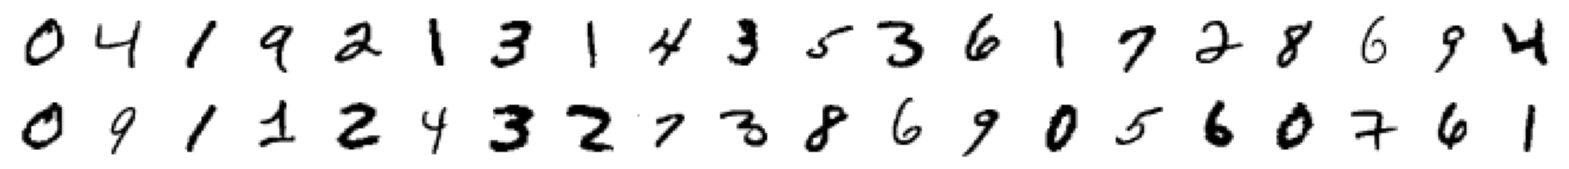

In [60]:
columns = 20
rows = 2
fig = plt.figure(figsize=(columns, rows))
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], cmap="binary")
    plt.axis('off')
plt.show()

In [61]:
for i in range(1, columns * rows + 1): print(y_train[i], end=", ")

0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 

숫자 손글씨 자료 또한 그림이기 때문에, 데이터 하나는 2차원 데이터이다. 

이 예제에서는 각 데이터를 먼저 1차원으로 reshape하여 인공 신경망에 입력해 보도록 한다.

이전과 마찬가지로 `X`의 값들을 255로 나누어 0과 1사이의 실수로 변환한다.

In [51]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 

이번에는 ```y```값들을 원-핫 벡터 인코딩으로 바꾸어 테스트해 보자.

원-핫 벡터는 해당 클래스 번호의 index에만 1의 값이 배정되고, 나머지에는 모두 0이 배정된 벡터를 말한다.

Sparse label (클래스 인덱스)을 원-핫 벡터로 변경하려면 [```keras.utils.to_categorical```](https://keras.io/api/utils/python_utils/#tocategorical-function)를 이용한다.  

반대로 변환하려면 ```np.argmax()``` 함수를 이용한다.

In [52]:
y_train = keras.utils.to_categorical(y_train, 10)  # 10은 총 클래스의 숫자
y_test = keras.utils.to_categorical(y_test, 10)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [54]:
np.argmax(y_train[0])

5

<p> <font color=#00008B> &#9635 Model structure </font> </p>

* 입력층은 784개의 값이다. (28 x 28 = 784).

* 첫 번째 은닉층은 Dense 층으로 512개의 유닛과 ```relu``` activation function으로 구성

* 두 번째 은닉층은 Dropout 층으로 0.2 값을 가짐.

   * Dropout은 훈련 중에 무작위로 선택된 뉴런을 무시하는 기술로 overfitting을 방지하기 위한 목적이다.

* 세 번째 은닉층은 Dense 층으로 512 뉴런과 ```relu``` activation function으로 구성

* 네 번째 은닉층은 Dropout (0.2)

* 다섯 번째 은닉층은 10개의 뉴런과```softmax``` activation function으로 구성

* loss function : ```categorical_crossentropy``` (원-핫 벡터를 사용 예정)

* Optimizer : ```RMSprop```

* metrics :  ```accuracy```.

* batch size : 128

* epochs : 20

In [55]:
from tensorflow.keras.models import Sequential
model = Sequential() 
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,))) 
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Dropout 층이 추가 되었는데 나중에 더 자세히 알아보자.

```y```가 one-hot vector이기 때문에, loss function으로 `categorical_crossentropy`를 이용한다. 

이전의 fashion mninst 예제에서는 `y`가 클래스 번호를 나타냈기 때문에, loss function으로 `sparse_categorical_crossentropy`를 이용했던 것을 기억하라.

In [57]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = 'RMSprop', 
   metrics = ['accuracy'])

In [58]:
history = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 20, 
   verbose = 1, 
   validation_data = (x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 0.2569 - accuracy: 0.9215 - val_loss: 0.1228 - val_accuracy: 0.9590
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 0.0898 - val_accuracy: 0.9708
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0717 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0687 - val_accuracy: 0.9794
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0635 - val_accuracy: 0.9832
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0622 - val_accuracy: 0.9830

In [59]:
import numpy as np
for i in range(50): print(np.argmax(y_test[i]), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

In [60]:
for result in model.predict(x_test[:50]) : print(np.argmax(result), end=", ")

2/2 [==============================] - 0s 5ms/step
7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

모델이 예측을 잘못한 경우를 찾아 어떤 그림인지 체크해 보자.

313/313 [==============================] - 0s 994us/step
prediction :  9
actual :  4


prediction :  9
actual :  2


prediction :  3
actual :  2


prediction :  2
actual :  4


prediction :  7
actual :  2




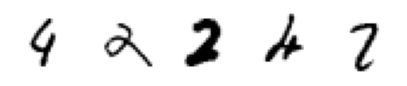

In [72]:
columns = 5
rows = 1
fig = plt.figure(figsize=(columns, rows))
    
count = 1
for i, result in enumerate(model.predict(x_test)):
    if np.argmax(y_test[i]) != np.argmax(result):
        fig.add_subplot(rows, columns, count)
        plt.imshow((x_test[i] * 255).reshape(28, 28), cmap="binary")
        plt.axis('off')
        print("prediction : ", np.argmax(result))
        print("actual : ", np.argmax(y_test[i]))
        print("\n")
        count += 1
        if count == columns + 1 : break
            
plt.show()

### wine data 예제

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [74]:
raw_wine = datasets.load_wine()

In [75]:
X = raw_wine.data
y = raw_wine.target

In [76]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(13, input_shape=(X_tn.shape[1], ))) # feature 13개
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 100)               1400      
                                                                 
 dense_14 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


In [79]:
keras.utils.plot_model(model,  show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [80]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [81]:
num_epo = 50
history = model.fit(X_tn, y_tn, epochs=num_epo, batch_size=5,
                    validation_data=(X_te, y_te))

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 8.4297 - accuracy: 0.2030 - val_loss: 6.9350 - val_accuracy: 0.3333
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 5.3848 - accuracy: 0.1805 - val_loss: 2.6629 - val_accuracy: 0.4222
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 2.2794 - accuracy: 0.4361 - val_loss: 1.3135 - val_accuracy: 0.6222
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 1.9977 - accuracy: 0.5038 - val_loss: 1.1319 - val_accuracy: 0.5778
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 1.3254 - accuracy: 0.5639 - val_loss: 1.6933 - val_accuracy: 0.6889
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 1.3919 - accuracy: 0.5789 - val_loss: 0.6963 - val_accuracy: 0.6222
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9049 - accuracy: 0.6090 - val_loss: 0.6896 - val_accuracy: 0.6444
Epoch 8/50
27/27 [==

In [82]:
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 750us/step - loss: 1.7580 - accuracy: 0.6241
0.6240601539611816


In [83]:
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.7111
0.7111111283302307


In [84]:
print(history.history["accuracy"])

[0.2030075192451477, 0.18045112490653992, 0.43609023094177246, 0.5037593841552734, 0.5639097690582275, 0.5789473652839661, 0.6090225577354431, 0.518796980381012, 0.5338345766067505, 0.5563910007476807, 0.646616518497467, 0.6616541147232056, 0.5714285969734192, 0.6240601539611816, 0.7218044996261597, 0.7218044996261597, 0.5864661931991577, 0.6240601539611816, 0.6390977501869202, 0.6090225577354431, 0.7669172883033752, 0.7293233275413513, 0.5413534045219421, 0.6315789222717285, 0.7669172883033752, 0.6541353464126587, 0.8195488452911377, 0.7518796920776367, 0.8195488452911377, 0.8345864415168762, 0.8345864415168762, 0.7969924807548523, 0.7819548845291138, 0.8045112490653992, 0.8045112490653992, 0.7669172883033752, 0.8120300769805908, 0.7969924807548523, 0.7518796920776367, 0.6992481350898743, 0.7293233275413513, 0.7518796920776367, 0.8120300769805908, 0.8571428656578064, 0.8496240377426147, 0.7443609237670898, 0.7669172883033752, 0.8120300769805908, 0.8270676732063293, 0.8120300769805908]

In [85]:
print(history.history["loss"])

[8.429679870605469, 5.384766578674316, 2.2794349193573, 1.9976556301116943, 1.3253822326660156, 1.3918923139572144, 0.9049406051635742, 1.9002938270568848, 1.7356116771697998, 1.6658508777618408, 0.9698940515518188, 0.8835503458976746, 1.1940491199493408, 1.1439869403839111, 0.5747676491737366, 0.7093634605407715, 1.5489556789398193, 1.1512935161590576, 1.0377527475357056, 1.3684996366500854, 0.6372561454772949, 0.6499015092849731, 1.7206230163574219, 1.1394989490509033, 0.6180935502052307, 1.0153744220733643, 0.5150085091590881, 0.764784574508667, 0.5467249155044556, 0.647202730178833, 0.44542673230171204, 0.5702886581420898, 0.5836570858955383, 0.6058326959609985, 0.6359829902648926, 0.6152138113975525, 0.599946916103363, 0.5591790080070496, 0.9596642255783081, 1.6839174032211304, 0.6819493174552917, 0.9872211813926697, 0.5385915040969849, 0.44244036078453064, 0.4431816041469574, 0.9219846725463867, 0.8815590143203735, 0.7497178316116333, 0.5929477214813232, 0.6085813641548157]


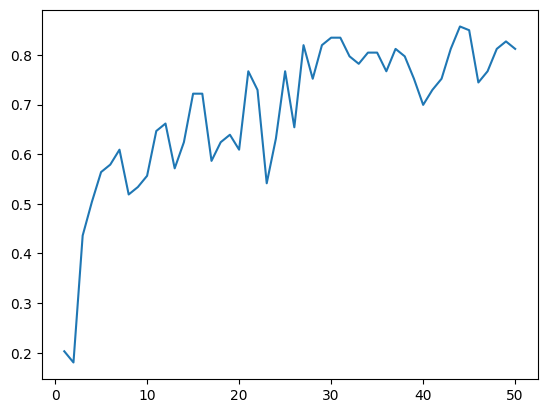

In [86]:
plt.plot(range(1, num_epo+1), history.history["accuracy"])
plt.show()

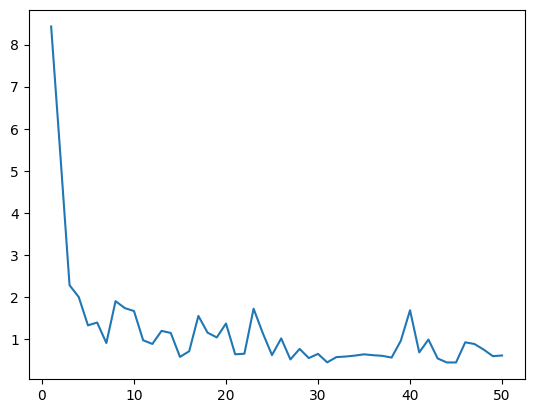

In [87]:
plt.plot(range(1, num_epo+1), history.history["loss"])
plt.show()

### 영화 리뷰 예제

이 예제는 영화 리뷰(review) 텍스트를 긍정(positive) 또는 부정(negative)으로 분류한다.

In [88]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

위에서 ```num_words=10000```은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택한다. 

이 데이터셋의 샘플은 전처리된 정수 배열로, 영화 리뷰에 나오는 단어를 숫자로 변환한 것이다.

레이블(label)은 정수 0 또는 1로서, 0은 부정적인 리뷰이고 1은 긍정적인 리뷰이다.

In [89]:
train_labels[3]

1

In [90]:
print(f"훈련 샘플: {len(train_data)}, 레이블: {len(train_labels)}")

훈련 샘플: 25000, 레이블: 25000


In [91]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [92]:
len(train_data[0]), len(train_data[1])

(218, 189)

다음은 정수를 다시 문자열로 변환할 필요가 있을 때 사용하기 위해 만들어졌다.

In [93]:
word_index = imdb.get_word_index() 

In [94]:
# 처음 몇 개 인덱스는 사전에 정의되어 있음.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [95]:
train_data[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


In [96]:
decode_review(train_data[3])

"<START> the <UNK> <UNK> at storytelling the traditional sort many years after the event i can still see in my <UNK> eye an elderly lady my friend's mother retelling the battle of <UNK> she makes the characters come alive her passion is that of an eye witness one to the events on the <UNK> heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and <UNK> of scotland as i discussed it with a friend one night in <UNK> a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional <UNK> fact and fiction blend with <UNK> role models warning stories <UNK> magic and mystery br br my name is <UNK> like my g

In [97]:
len(train_data[3])

550

데이터 구성

리뷰-정수 배열-는 신경망에 주입하기 전에 텐서로 변환되어야 한다. 변환하는 방법에는 몇 가지가 있다.

* 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환한다. 예를 들어 배열 ```[3, 5]```을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있다. 

* 다른 방법으로는, 정수 배열의 길이가 모두 같도록 패딩(padding), 예를 들어 0의 값, 을 추가해 ```max_length * num_reviews``` 크기의 정수 텐서를 만든다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있다.

이 예제에서는 두 번째 방식을 사용한다.

In [98]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post')

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',)

In [99]:
train_data[3]

array([1, 4, 2, ..., 0, 0, 0])

In [100]:
decode_review(train_data[3])

"<START> the <UNK> <UNK> at storytelling the traditional sort many years after the event i can still see in my <UNK> eye an elderly lady my friend's mother retelling the battle of <UNK> she makes the characters come alive her passion is that of an eye witness one to the events on the <UNK> heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and <UNK> of scotland as i discussed it with a friend one night in <UNK> a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional <UNK> fact and fiction blend with <UNK> role models warning stories <UNK> magic and mystery br br my name is <UNK> like my g

In [101]:
train_data[0]

array([ 1, 14, 22, ...,  0,  0,  0])

In [102]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

모델 구성에서는 크게 다음 두 가지를 고려한다.

* 모델에서 얼마나 많은 층을 사용할 것인가?
* 각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?

이 예제의 입력 데이터는 단어 인덱스의 배열이며 예측할 레이블은 0 또는 1이다.  
이 문제에 맞는 모델을 구성해야 한다.

In [103]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


위 코드에서

1. 첫 번째 층은 Embedding 층이다. 이 층은 정수로 인코딩된 단어를 입력 받아, 각 단어 인덱스에 해당하는 임베딩 벡터를 찾는다. 임베딩 벡터는 실수로 구성되어 있으며, 단어 간 유사도를 고려하여 생성된다. 단어를 실수 벡터로 변환하는 방법에는 여러가지가 있다.

2. 그 다음 GlobalAveragePooling1D 층은 sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환한다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법이다.

3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거친다.

4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층으로. sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력한다. 이 값은 확률 또는 신뢰도를 나타낸다.

In [104]:
# example : embedding

x = np.array([[1,2,3,4,5,6,7,8,9,9],
       [3,4,1,6,7,8,9,2,0,0],
       [1,1,2,3,2,2,2,2,1,1]])
              
tf.keras.layers.Embedding(input_dim = 10, output_dim = 2, input_length=10)(x)

<tf.Tensor: shape=(3, 10, 2), dtype=float32, numpy=
array([[[-0.04195602,  0.04548175],
        [ 0.0073735 ,  0.03801725],
        [ 0.0475576 , -0.0265579 ],
        [ 0.02824166,  0.04904347],
        [ 0.02700103, -0.04945821],
        [ 0.00785576,  0.04177264],
        [ 0.02711948, -0.03595161],
        [ 0.01092887,  0.01093785],
        [ 0.00188119, -0.03839679],
        [ 0.00188119, -0.03839679]],

       [[ 0.0475576 , -0.0265579 ],
        [ 0.02824166,  0.04904347],
        [-0.04195602,  0.04548175],
        [ 0.00785576,  0.04177264],
        [ 0.02711948, -0.03595161],
        [ 0.01092887,  0.01093785],
        [ 0.00188119, -0.03839679],
        [ 0.0073735 ,  0.03801725],
        [-0.03705452,  0.01905917],
        [-0.03705452,  0.01905917]],

       [[-0.04195602,  0.04548175],
        [-0.04195602,  0.04548175],
        [ 0.0073735 ,  0.03801725],
        [ 0.0475576 , -0.0265579 ],
        [ 0.0073735 ,  0.03801725],
        [ 0.0073735 ,  0.03801725],
        

In [105]:
# Embedding example
temp_model = tf.keras.Sequential()
temp_model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
input_array = np.random.randint(1000, size=(32, 10))
input_array

array([[545, 835,   3, 125, 517, 855, 218, 174,  87, 374],
       [283, 685, 992, 867,  96, 152, 197,  23, 205, 900],
       [918, 938, 550,  68, 898, 677,  21, 130, 235, 742],
       [886, 532, 929, 259,   3, 713, 345, 950, 720, 891],
       [555, 902, 996, 850, 399, 651, 559, 583, 515, 812],
       [607,  67, 807, 816, 218, 140, 811, 448, 621, 828],
       [591, 577, 413, 643, 111, 207, 734, 940, 202, 221],
       [375, 792, 503, 264, 873, 897, 506, 971, 221, 232],
       [844, 523, 910, 782, 749, 663, 315, 282, 539, 136],
       [235, 152, 636, 864, 863,  50, 211, 692, 644, 292],
       [149, 820, 649, 288, 108, 457, 893, 460, 536, 440],
       [ 74, 596,  44, 846,  13,  91, 757, 994, 661,  18],
       [254, 569, 388, 964, 956, 573, 976, 278, 222, 295],
       [287, 691, 372, 390, 483,  63, 301, 409, 936, 295],
       [694, 296, 670, 188, 300, 916, 931, 456, 825, 768],
       [317, 669, 160, 209, 888, 625, 194, 782, 932, 918],
       [545, 996, 453, 745, 208, 310, 957, 867, 521, 324

In [106]:
temp_model.compile('rmsprop', 'mse')
output_array = temp_model.predict(input_array)
output_array[0]

1/1 [==============================] - 0s 18ms/step


array([[-2.25507375e-02, -1.69126876e-02,  4.97740768e-02,
        -3.97592410e-02,  4.54576053e-02, -1.82119608e-02,
         4.54061367e-02, -1.12533458e-02, -3.32135707e-02,
         1.65398233e-02,  3.13594677e-02,  2.29030289e-02,
        -1.02494135e-02,  2.56770737e-02,  3.91261689e-02,
        -3.87561209e-02,  1.81150436e-03,  3.85264494e-02,
         2.93809287e-02, -8.19572061e-03, -4.09614220e-02,
        -4.75366376e-02, -4.02386785e-02,  5.53666428e-03,
         8.72583315e-03,  2.76267417e-02,  4.24392559e-02,
         4.83051874e-02, -3.19785029e-02,  5.69325686e-03,
        -7.92915747e-03,  3.67328189e-02,  3.67460735e-02,
         1.02377534e-02,  1.93558373e-02, -2.98400763e-02,
        -2.88632642e-02,  3.97290476e-02, -1.00293644e-02,
         2.04119794e-02,  1.92701109e-02, -1.20667815e-02,
        -2.96753403e-02,  1.07647553e-02,  2.20833160e-02,
        -4.96627465e-02, -1.82061903e-02, -2.97662262e-02,
         4.69750427e-02, -3.61490734e-02,  2.25764401e-0

In [107]:
print(output_array.shape)

(32, 10, 64)


In [108]:
# example : GlobalAveragePooling1D

x = np.array([[[0,  0,  -1,  0.01112024],
              [ 1,  2,  -5, -1.0028812 ],
              [ 2, 10 ,  5 ,  1.0640281 ]],

             [[ 10, 0.8804889 ,  0.9927939 ,  0.67354965],
              [20, -0.41982535, -0.8374683 ,  0.7963619 ],
              [30 ,0.04415631,  1.5271544 , -1.0769233 ]]])

In [109]:
x.shape

(2, 3, 4)

In [110]:
y = tf.keras.layers.GlobalAveragePooling1D()(x)
y

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 1.        ,  4.        , -0.33333334,  0.02408908],
       [20.        ,  0.16827327,  0.5608267 ,  0.13099611]],
      dtype=float32)>

In [111]:
print(y.shape)

(2, 4)


In [112]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [113]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [114]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 3s 80ms/step - loss: 0.6931 - accuracy: 0.5148 - val_loss: 0.6930 - val_accuracy: 0.4957
Epoch 2/40
30/30 [==============================] - 2s 75ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6926 - val_accuracy: 0.5266
Epoch 3/40
30/30 [==============================] - 2s 74ms/step - loss: 0.6922 - accuracy: 0.5333 - val_loss: 0.6919 - val_accuracy: 0.5226
Epoch 4/40
30/30 [==============================] - 2s 74ms/step - loss: 0.6910 - accuracy: 0.5525 - val_loss: 0.6907 - val_accuracy: 0.5279
Epoch 5/40
30/30 [==============================] - 2s 75ms/step - loss: 0.6892 - accuracy: 0.5910 - val_loss: 0.6884 - val_accuracy: 0.5945
Epoch 6/40
30/30 [==============================] - 2s 75ms/step - loss: 0.6866 - accuracy: 0.5946 - val_loss: 0.6854 - val_accuracy: 0.5906
Epoch 7/40
30/30 [==============================] - 2s 74ms/step - loss: 0.6821 - accuracy: 0.6523 - val_loss: 0.6800 - val_accuracy: 0.6682
Epoch 8/40
30

In [115]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3366 - accuracy: 0.8673 - 1s/epoch - 2ms/step
[0.33664581179618835, 0.8673200011253357]


In [116]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

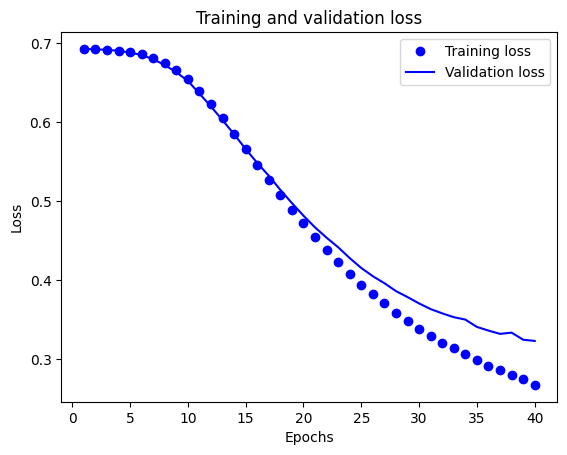

In [117]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

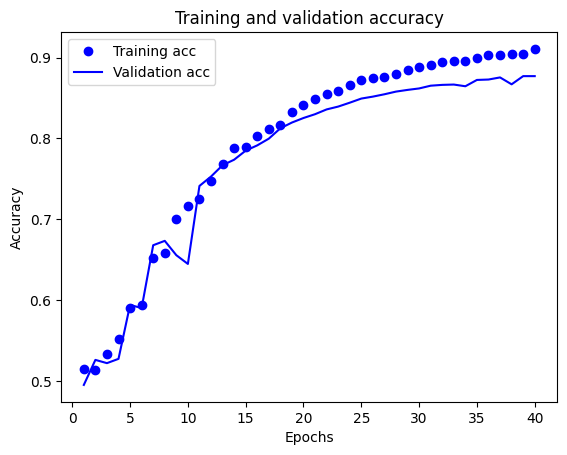

In [118]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### More on embedding example

In [119]:
from numpy import array

# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50

encoded_docs = [tf.keras.preprocessing.text.one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[5, 18], [14, 28], [43, 14], [46, 28], [14], [40], [28, 14], [8, 14], [28, 28], [26, 32, 18, 30]]


In [120]:
# pad documents to a max length of 4 words
max_length = 4

padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [121]:
# define the model
embedding_model = Sequential()
embedding_model.add(keras.layers.Embedding(vocab_size, 4, input_length=max_length))
embedding_model.add(keras.layers.Flatten())
embedding_model.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the model
embedding_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(embedding_model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 4)              200       
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
# fit the model
embedding_model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = embedding_model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


In [123]:
first = keras.models.Model(inputs = embedding_model.input, outputs = embedding_model.layers[0].output)

In [124]:
print(padded_docs)

[[ 5 18  0  0]
 [14 28  0  0]
 [43 14  0  0]
 [46 28  0  0]
 [14  0  0  0]
 [40  0  0  0]
 [28 14  0  0]
 [ 8 14  0  0]
 [28 28  0  0]
 [26 32 18 30]]


In [125]:
first.predict(padded_docs)

1/1 [==============================] - 0s 18ms/step


array([[[ 0.09646397,  0.07356513,  0.02208707, -0.01243161],
        [-0.0277207 ,  0.08621553, -0.00387762, -0.00065113],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597]],

       [[ 0.08188313,  0.0095627 ,  0.07290186, -0.09305233],
        [-0.07295327, -0.00103966, -0.05476551,  0.08568652],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597]],

       [[ 0.04009704,  0.08741795,  0.00173433, -0.06351241],
        [ 0.08188313,  0.0095627 ,  0.07290186, -0.09305233],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597]],

       [[ 0.04518907,  0.01530632,  0.0050627 , -0.04827546],
        [-0.07295327, -0.00103966, -0.05476551,  0.08568652],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597],
        [-0.04855411,  0.00036058,  0.08651519, -0.00430597]],



In [126]:
padded_docs[0]

array([ 5, 18,  0,  0])